# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Syaiful Bahri Dirgantara
- **Email:** syaifulbahridirgantara@gmail.com
- **ID Dicoding:** syaiful_bahri_dirgantara_EBsw

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

Apakah kategori produk dan lokasi pelanggan yang mendapatkan volume penjualan tertinggi dan terendah?


- Pertanyaan 2

Berapa lama rata-rata waktu pengiriman setiap kota, dan bagaimana hubungan waktu pengiriman dengan ulasan pengguna?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

#### Gathering Data

In [ ]:
# Memuat data
products = pd.read_csv('https://drive.google.com/uc?id=1OguwsMaRrvAGlZXzy-0xyn5Lrv50CzsD')
product_translation = pd.read_csv('https://drive.google.com/uc?id=1oIh6OvYFS4Q09ode1gk6GvUyQjabdwFI')
reviews = pd.read_csv('https://drive.google.com/uc?id=1MGHu8STjZIcGHPcQeccMvcJi8ESm-sjL')
orders = pd.read_csv('https://drive.google.com/uc?id=1zvDxQY5qrta2eJIebO572AsUGZepk8nw')
order_items = pd.read_csv('https://drive.google.com/uc?id=1OGB12emxEPR9X1pMoUNxKXo5VH56ro3C')
customers = pd.read_csv('https://drive.google.com/uc?id=1R_B2hI-W1SO_Rry2Nxub9rBl8U246lJC')

# Gabung product dengan kategorynya
products = products.merge(product_translation, on='product_category_name', how='left')

# Untuk order, hanya ambil yang berhasil terkirim
orders = orders[orders['order_status'] == 'delivered']

# Gabung semua dataset
order_details = (order_items.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(reviews, on='order_id', how='left').merge(customers, on='customer_id', how='left'))
order_details.head()

# Drop kolom yang tidak diperlukan
order_details.drop(columns=['seller_id', 'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'review_creation_date', 'review_answer_timestamp', 'customer_zip_code_prefix'], inplace=True)
order_details.head()

,order_id,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,customer_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP


**Insight:**
- Order yang tidak terkirim tidak diperlukan untuk analisis
- Kolom-kolom yang tidak memiliki potensi untuk menunjukkan hubungan antara kategori, ulasan, dan lokasi pelanggan terhadap volume penjualan lebih baik tidak diikutsertakan sedari awal
- Kolom-kolom yang tidak memiliki hubungan dengan waktu pengiriman lebih baik tidak diikutsertakan

#### Assessing Data

In [ ]:
# Informasi dataset
print(order_details.info())
print(order_details.describe())

# Cek missing value
print(order_details.isnull().sum())

# Cek duplikat
print(order_details.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   price                          113314 non-null  float64
 4   freight_value                  113314 non-null  float64
 5   product_category_name          111702 non-null  object 
 6   product_category_name_english  111678 non-null  object 
 7   customer_id                    110840 non-null  object 
 8   order_status                   110840 non-null  object 
 9   order_purchase_timestamp       110840 non-null  object 
 10  order_approved_at              110825 non-null  object 
 11  order_delivered_carrier_date   110838 non-null  object 
 12  order_delivered_customer_date 

**Insight:**
- Terdapat missing value yang jumlahnya variatif di 16 fitur
- Tidak terdapat duplikasi data dalam dataset

#### Cleaning Data

In [ ]:
# Hapus yang terlalu banyak missing value
order_details.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

# Hapus yang tidak memiliki customer_id
order_details.dropna(subset=['customer_id', 'review_id'], inplace=True)

# Isi 'Unknown' untuk kategori produk
order_details['product_category_name'] = order_details['product_category_name'].fillna('Unknown')
order_details['product_category_name_english'] = order_details['product_category_name_english'].fillna('Unknown')

# Isi delivered date dengan estimated date
order_details['order_delivered_customer_date'] = order_details['order_delivered_customer_date'].fillna(order_details['order_estimated_delivery_date'])
order_details['order_delivered_carrier_date'] = order_details['order_delivered_carrier_date'].fillna(order_details['order_estimated_delivery_date'])
order_details['order_approved_at'] = order_details['order_approved_at'].fillna(order_details['order_purchase_timestamp'])

In [ ]:
# Cek missing value
print(order_details.isnull().sum())

order_id                         0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
customer_unique_id               0
customer_city                    0
customer_state                   0
dtype: int64


**Insight:**
- Untuk fitur judul ulasan dan komentar ulasan dihapus karena memiliki terlalu banyak missing value dan tidak terlalu berguna dalam analisis yang dilakukan
- Hapus semua baris yang tidak memiliki customer id karena fitur tersebut diperlukan tetapi juga tidak dapat dilakukan imputasi karena unik
- Isi dengan 'Unkown' untuk kategori produk
- Untuk delivered date diisi dengan estimated date, diaanggap waktu terkirimnya barang sesuai dengan estimasinya
- Pada tahap ini telah dipastikan sudah tidak terdapat missing value

## Exploratory Data Analysis (EDA)

### Pertanyaan 1

In [ ]:
# Volume penjualan per kategori produk
sales_by_category = order_details.groupby('product_category_name_english')['order_item_id'].count()
print(sales_by_category)
print(sales_by_category.describe())
sales_by_category = sales_by_category.sort_values(ascending=False)
# print(sales_by_category)
# sales_by_category = sales_by_category.reset_index()

product_category_name_english
Unknown                       1555
agro_industry_and_commerce     206
air_conditioning               284
art                            195
arts_and_craftmanship           24
                              ... 
stationery                    2459
tablets_printing_image          81
telephony                     4408
toys                          4007
watches_gifts                 5825
Name: order_item_id, Length: 72, dtype: int64
count       72.000000
mean      1527.958333
std       2534.771704
min          2.000000
25%         94.500000
50%        278.000000
75%       1727.250000
max      10985.000000
Name: order_item_id, dtype: float64


In [ ]:
# Valume penjualan berdasarkan lokasi
sales_by_location = order_details.groupby('customer_city')['order_item_id'].count()
print(sales_by_location)
print(sales_by_location.describe())
sales_by_location = sales_by_location.sort_values(ascending=False)

customer_city
abadia dos dourados     3
abadiania               1
abaete                 12
abaetetuba             14
abaiara                 2
                       ..
xinguara               10
xique-xique             3
zacarias                2
ze doca                 5
zortea                  2
Name: order_item_id, Length: 4083, dtype: int64
count     4083.000000
mean        26.944159
std        312.836621
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max      17399.000000
Name: order_item_id, dtype: float64


**Insight:**
- Rata-rata volume penjualan untuk setiap kategori produk adalah 1528 item dengan volume penjualan tertinggi 10985 item dan terendah 2 item
- Rata-rata volume penjualan untuk setiap lokasi pelanggan produk adalah 27 item dengan volume penjualan tertinggi 17399 item dan terendah 1 item

### Pertanyaan 2

In [ ]:
order_details['delivery_time'] = (pd.to_datetime(order_details['order_delivered_customer_date']) -
                                  pd.to_datetime(order_details['order_purchase_timestamp'])).dt.days

delivery_by_location = order_details.groupby('customer_city')['delivery_time'].mean().sort_values(ascending=False)
print(delivery_by_location)
print(delivery_by_location.describe())
delivery_by_reviews = order_details.groupby('review_score')['delivery_time'].mean().reset_index()
# print(delivery_by_reviews)
delivery_analysis = order_details.groupby(['customer_city', 'review_sentiment'])['delivery_time'].mean().reset_index()
# print(delivery_analysis)

delivery_negatif = delivery_analysis[delivery_analysis['review_sentiment'] == 'negatif']
delivery_positif = delivery_analysis[delivery_analysis['review_sentiment'] == 'positif']
delivery_combined = delivery_negatif.merge(delivery_positif, on='customer_city', suffixes=('_negative', '_positive'))
print(delivery_combined)
print(delivery_combined.describe())

customer_city
novo brasil            148.000000
capinzal do norte      109.000000
adhemar de barros       97.000000
santa cruz de goias     86.000000
arace                   85.750000
                          ...    
bento de abreu           3.333333
siriji                   3.000000
acucena                  3.000000
contenda                 3.000000
iomere                   2.000000
Name: delivery_time, Length: 4083, dtype: float64
count    4083.000000
mean       15.580870
std         7.956600
min         2.000000
25%        10.827626
50%        14.000000
75%        18.371173
max       148.000000
Name: delivery_time, dtype: float64
     customer_city review_sentiment_negative  delivery_time_negative  \
0           abaete                   negatif                     7.0   
1       abaetetuba                   negatif                    28.0   
2           abatia                   negatif                    21.5   
3     abelardo luz                   negatif                    25.0  

**Insight:**
- Lokasi dengan history waktu pengiriman paling lambat berurutan adalah novo brasil, capinzal do norte, adhemar de barros, santa cruz de goias, dan arace
- Lokasi dengan history waktu pengiriman paling cepat berurutan adalah iomere, contenda, acucena, siriji, dan bento de abreu
- Rata-rata waktu pengiriman berdasarkan lokasi pelanggan yang mengirimkan ulasan negatif adalah 21 hari
- Rata-rata waktu pengiriman berdasarkan lokasi pelanggan yang mengirimkan ulasan positif adalah 13 hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

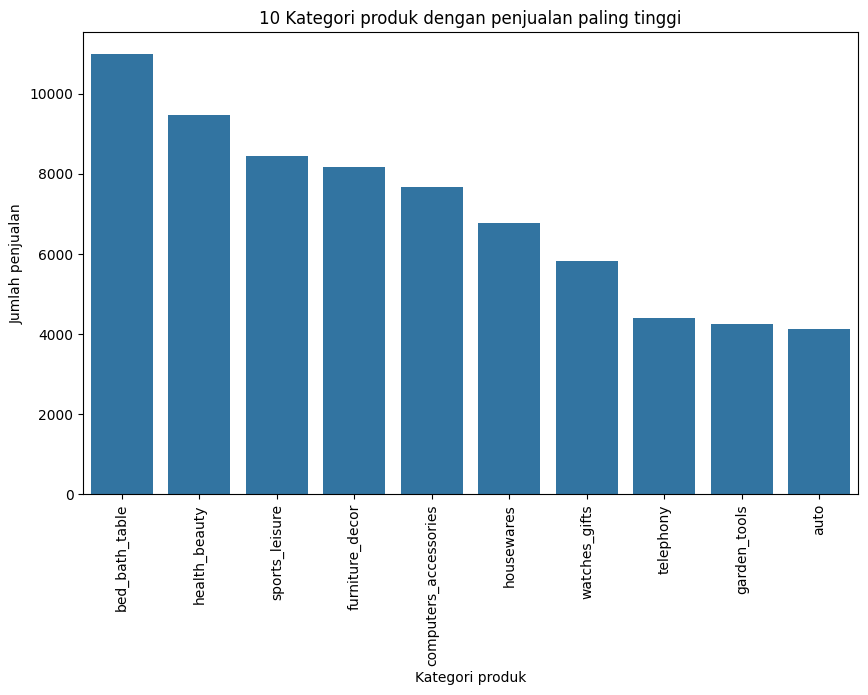

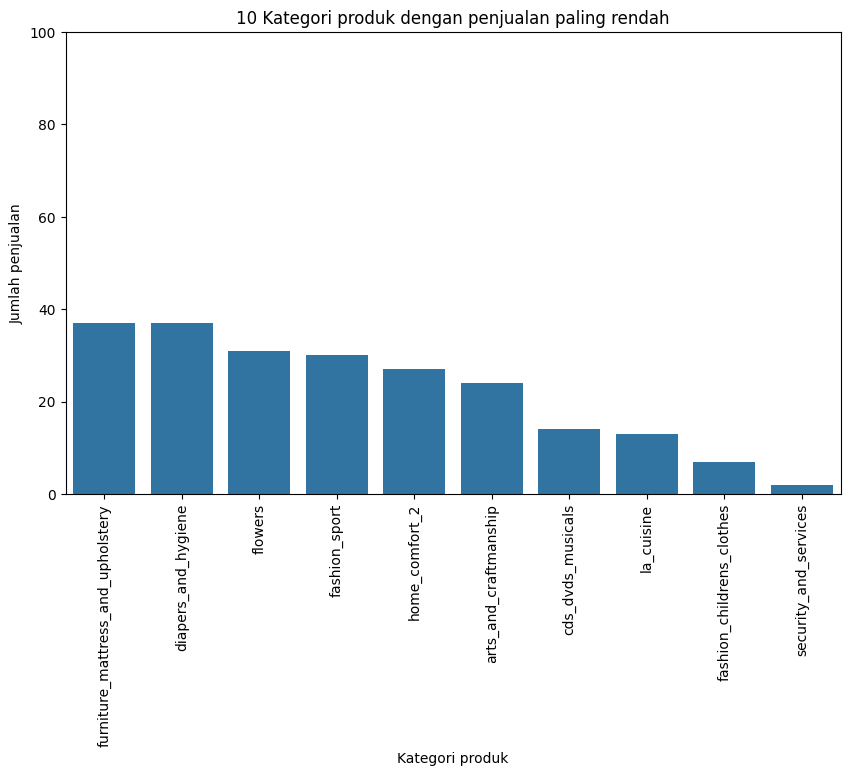

In [ ]:
# Sales by category
y_max = sales_by_category.max()

top_10_categories = sales_by_category.head(10).reset_index()
# print(top_10_categories)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_categories, x='product_category_name_english', y='order_item_id')
plt.title("10 Kategori produk dengan penjualan paling tinggi")
# plt.ylim(0, y_max)
plt.xticks(rotation=90)
plt.xlabel('Kategori produk')
plt.ylabel('Jumlah penjualan')
plt.show()

bottom_10_categories = sales_by_category.tail(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_categories, x='product_category_name_english', y='order_item_id')
plt.title("10 Kategori produk dengan penjualan paling rendah")
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.xlabel('Kategori produk')
plt.ylabel('Jumlah penjualan')
plt.show()

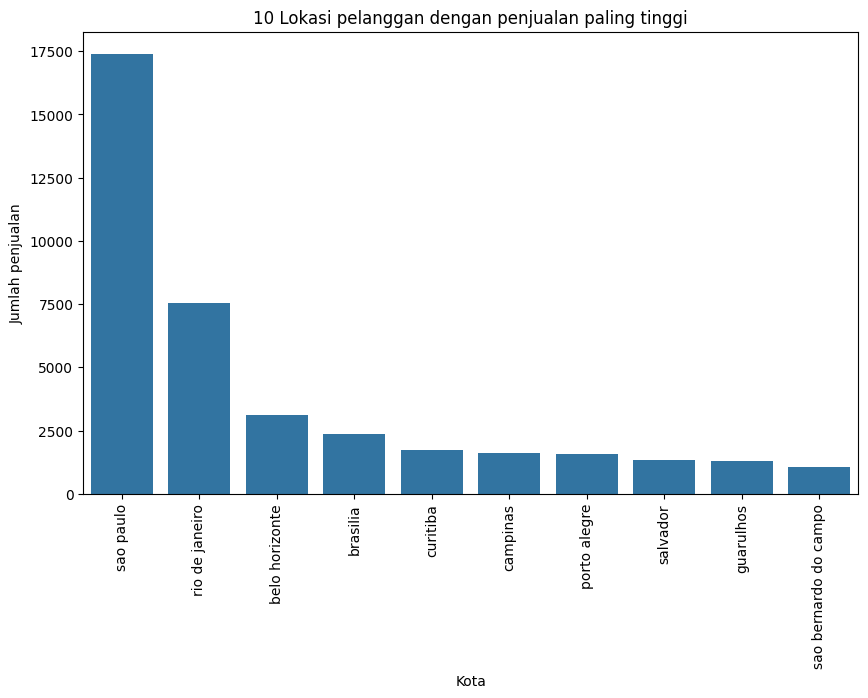

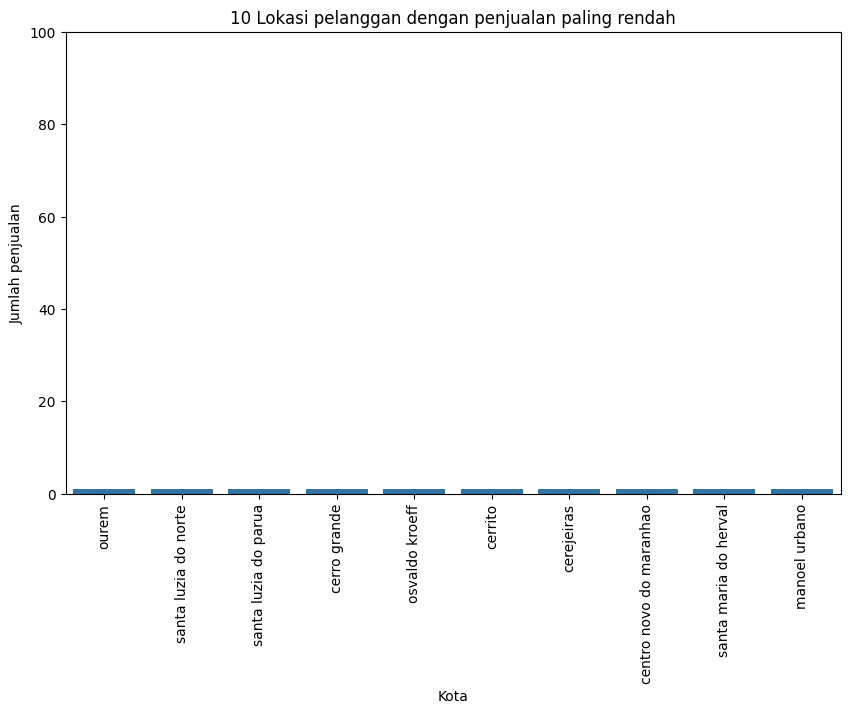

In [ ]:
# Sales by location
y_max = sales_by_location.max()

top_10_location = sales_by_location.head(10).reset_index()
# print(top_10_location)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_location, x='customer_city', y='order_item_id')
plt.title("10 Lokasi pelanggan dengan penjualan paling tinggi")
# plt.ylim(0, y_max)
plt.xticks(rotation=90)
plt.xlabel('Kota')
plt.ylabel('Jumlah penjualan')
plt.show()

bottom_10_location = sales_by_location.tail(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_location, x='customer_city', y='order_item_id')
plt.title("10 Lokasi pelanggan dengan penjualan paling rendah")
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.xlabel('Kota')
plt.ylabel('Jumlah penjualan')
plt.show()

**Insight:**
- Kategori produk yang memiliki volume penjualan teratas beberapa berhubungan dengan pola hidup sehat dan kebutuhan dasae
- Lokasi pelanggan dengan volume penjualan teratas kebanyakan dari kota-kota besar

### Pertanyaan 2:

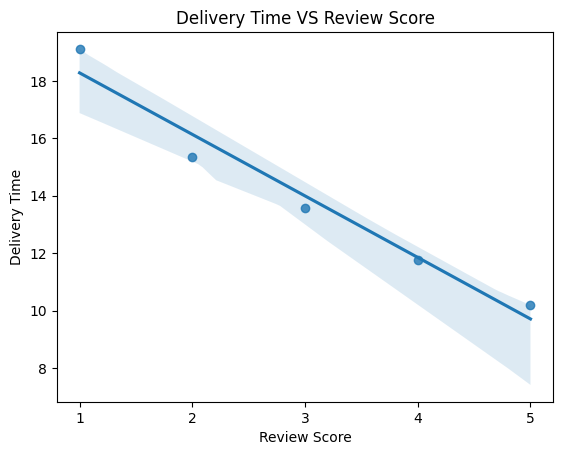

In [ ]:
# Delivery time X Review Score
sns.regplot(data=delivery_by_reviews, x='review_score', y='delivery_time')
plt.title('Delivery Time VS Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time')
plt.xticks(ticks=range(1,6,1))
plt.show()

**Insight:**
- Semakin tinggi waktu pengiriman, maka semakin rendah nilai ulasan yang diberikan

## Analisis Lanjutan (Opsional)

RFM Analysis

In [ ]:
rfm = order_details.groupby('customer_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'count',
    'order_item_id': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'order_item_id': 'Monetary'
})
print(rfm.describe())

          Frequency      Monetary
count  95832.000000  95832.000000
mean       1.147978      1.373383
std        0.550717      2.228216
min        1.000000      1.000000
25%        1.000000      1.000000
50%        1.000000      1.000000
75%        1.000000      1.000000
max       22.000000    231.000000


## Conclusion

- Conclution pertanyaan 1:
Telah ditemukan kategori produk dan lokasi pelanggan yang diberikan dengan volume penjualan teratas dan terendah. Volume penjualan teratas mayoritas dari kategori pola hidup sehat dan dari kota besar.

- Conclution pertanyaan 2:
Rata-rata waktu pengiriman setiap kota adalah 16 hari. Ulasan pengguna memiliki korelasi negatif (berbanding terbalik) dengan waktu pengiriman. Meningkatkan waktu pengiriman dapat memperbaiki ulasan pengguna menjadi lebih baik.